# LDA from scratch!

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit, logit

Explain what LDA is
 and applications of it

- Create practice data
- 5000 0's and 5000 1's
- Use a rand num generator based on covar materix so each group is centered around dif things
- Label the data

In [15]:
# Starting input for numpy's pseudo-random generator
np.random.seed(12)
num_observations = 5000

# Generates two sets of random observations (x1 and x2) from multivariate normal distributions with specific means and covariance matrices
x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

# Stacks x1 and x2 vertically to make a single array
simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
# Create a list of labels (0 or 1) for simulated_separable_features
simulated_labels = np.hstack((np.zeros(num_observations), np.ones(num_observations)))

Text(0.5, 1.0, 'Randomly Generated Data')

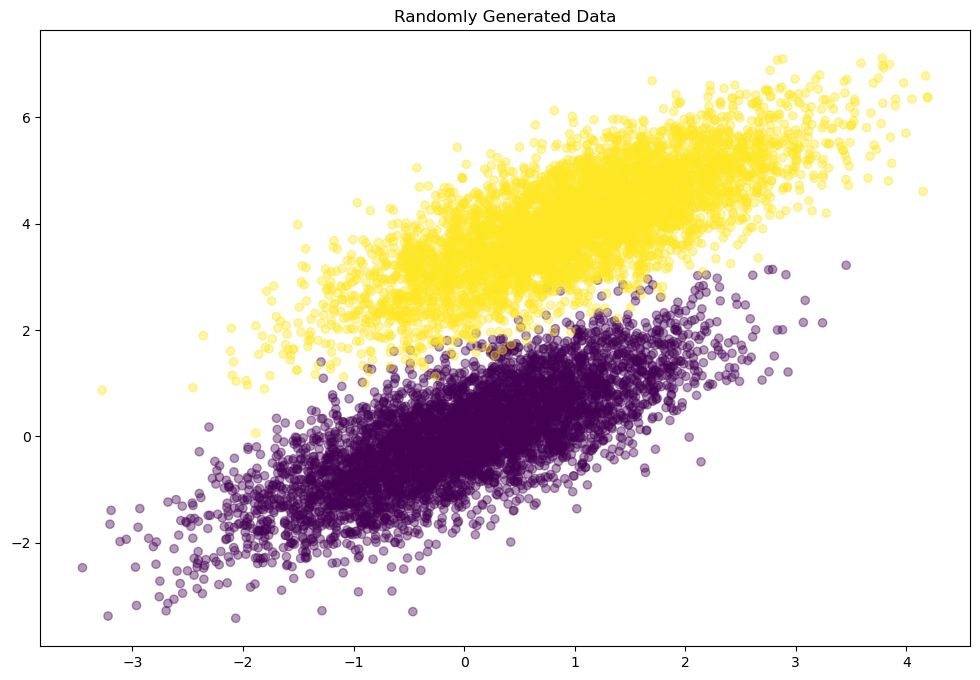

In [20]:
# Plot the random data set
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)
plt.title("Randomly Generated Data")

- Sigmoid function information
- Explain other math

In [25]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll


def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
        
    return weights


In [26]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)


-4346.264779152365
-148.70672276805357
-142.96493623107838
-141.5453030715737
-141.06031965930796
-140.87031585891606
-140.79025912753815
-140.75505002269912
-140.73914503180953
-140.7318349891588
-140.72843666694826
-140.72684471255326
-140.72609508950472
-140.72574086052296
-140.72557306887177
-140.7254934578617
-140.72545564250743
-140.7254376661433
-140.72542911609156
-140.7254250479478
-140.72542311181698
-140.72542219020232
-140.72542175145273
-140.72542154256132
-140.7254214431011
-140.72542139574284
-140.7254213731925
-140.7254213624546
-140.72542135734136
-140.72542135490647
